## 선형 회귀 분석

필요한 라이브러리
- torch.nn: 신경망 모델 포함
- torch.optim: Optimizer 포함
- torch.nn.init: 텐서에 초깃값을 주기 위해 필요함 함수 포함

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

- num_data: 사용할 데이터의 수
- num_epoch: 경사하강법 반복회수
- init.uniform_(): 균등 분포
- x: -10 ~ 10 까지 shape = [num_data,1] tensor 선언
- init_normal_(): data에 분포가 평균 = 0, 분산 = 1 인 표준정규 분포
- y: -17 ~ 23 까지 균등 분포
- noise: 실제 Data에 잡음이 발생하였다고 가정하기 위한 변수
- y_noise: 실제 Output에 잡음이 발생하였다고 가정하기 위한 변수

In [5]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data,1),-10,10)
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
y = 2*x + 3
y_noise = 2*(x+noise)+ 3

- nn.Linear(1,1): 선형회귀 모델  
torch.nn.Linear(in_features, out_features, bias=True)
- nn.L1Loss(): L1 Loss  
torch.nn.L1Loss(size_average=None, reduce=None, reduction='mean')
reduction을 *mean* 으로 할것이냐 *sum*으로 할것이냐에 따라서 식이 달라진다.  


**mean**
$loss(x,y) = \frac{1}{n} \sum |x_i-y_i|$


**sum**
$loss(x,y) = \sum |x_i-y_i|$

Data 분포 확인

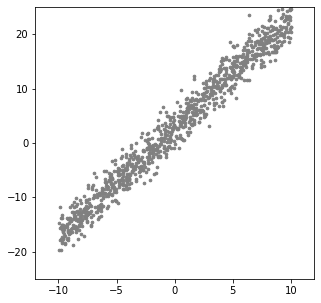

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(x.numpy(),y_noise.numpy(),s=7,c="gray")
plt.axis([-12, 12, -25, 25])
plt.show()

Model Loss선언

In [7]:
model = nn.Linear(1,1)
loss_func = nn.L1Loss()

**Optimizer: SGD**  


**pytorch에서 Optimizer를 사용할 때 주의하여야 하는 점은 Adagrad는 CPU에서만 작동한다는 것이다.**  
최적화할 변수로 model.parameters()라는 함수를 사용하여 모델의 변수 w와 b전달  
Learning Rate도 Optimizer선언할 때 한번에 선언 가능하다.

In [8]:
optimizer = optim.SGD(model.parameters(),lr=0.01)

- num_epoch: 반복할 회수
- optimizer.zero_grad(): 계산하였던 기울기를 0으로 초기화
- loss.backward(): w, b에대한 기울기가 계산
- optimizer.step(): 인수로 들어갔던 model.parameters()에서 리턴되는 변수들의 기울기에 Learning Rate가 곱하여 뺴줌으로서 Parameter Update

In [9]:
label = y_noise
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()
    
    if i % 100 ==0:
        print(loss.data)
param_list = list(model.parameters())
print(param_list[0].item(), param_list[1].item())

tensor(13.2775)
tensor(2.9081)
tensor(2.3610)
tensor(2.0096)
tensor(1.8026)
2.016664743423462 2.251629114151001


학습후 Data와 Model 확인
**Model 확인시 Optimizer를 거쳐서 Update되는 미분값이 아닌 실제 Data를 얻기 위해서 .detach()함수를 사용한다.**  
즉, .detach()를 호출하여 연산 기록으로부터 분리(detach)하여 이후 연산들이 추적되는 것을 방지 할 수 있다.

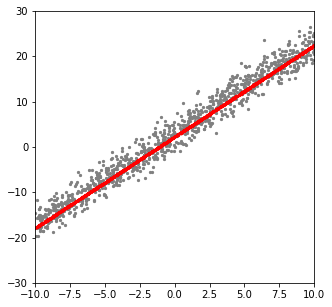

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.axis([-10, 10, -30, 30])
plt.show()